<a href="https://colab.research.google.com/github/Mayank-004/Project-in-python/blob/main/data_preprocessing_VCfeb28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


## Importing the dataset







In [226]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])

#dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID","Last VC Deal Type"],right_on=["Company ID","Deal Type"])





In [ ]:
dataset.describe()

In [119]:
dataset['MOIC']

0         NaN
1         NaN
2         NaN
3      16.44x
4         NaN
        ...  
300       NaN
301       NaN
302       NaN
303    55.20x
304    55.20x
Name: MOIC, Length: 305, dtype: object

Filling missing values of Target column MOIC

In [227]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['MOIC']= dataset['MOIC'].str.replace("x","") # removing $ from MOIC
dataset['MOIC']= dataset['MOIC'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'MOIC'] = dataset.loc[:,'MOIC'].astype(float) # converting MOIC to float from string


In [ ]:
dataset['MOIC'].count()

In [121]:
dataset['MOIC'].isna().sum()

197

In [228]:
dataset.dropna(subset = ["MOIC"], inplace=True)

In [ ]:
dataset.count()

In [229]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Implied EV/Cash Flow,108,100.000000
Implied EV/EBIT,108,100.000000
Debt Amount 3,108,100.000000
Contingent Payout,108,100.000000
Implied EV,108,100.000000
...,...,...
Deal Size Status,9,8.333333
CEO PBId,5,4.629630
Post Value (millions),4,3.703704
Raised to Date,4,3.703704


Drop Column which has missing values more than 30%

In [230]:


dataset=dataset.drop(columns=[
'Deal Type',
'Implied EV/Cash Flow',
'Implied EV/Revenue',
'Implied EV/Net Income',
'Implied EV/EBITDA',
'Debt/EBITDA',
'Debt Type',
'Debt/Equity',
'Debt Type',
'Debt Amount 1',
'Valuation/Cash Flow',
'Valuation/EBITDA',
'Valuation/EBIT',
'Deal Size/Cash Flow',
'Valuation/Net Income',
'EBITDA Margin %',
'Gross Profit',
'Deal Size/EBITDA',
'Deal Size/EBIT',
'EBITDA',
'Total Debt (from financials)',
'Net Income',
'Deal Size/Net Income',
'EBIT',
'Revenue Growth since last debt deal',
'Valuation/Revenue',
'Pre Value (millions)',
'Deal Size/Revenue',
'Revenue',
'Price per Share',
'# Follow-on Investors',
'% Acquired',
'Employees',
'Pre-money Valuation',
'Total Preferred Capital Raised ($M) - Combination**',
'% Preferred Capital Raised - Combination**',
'% Preferred Capital Raised*',
'Total Preferred Capital Raised ($M)*',
'Deal Type 3',
'Debt Type 3',
'Debt Type 2'	,
'Debt Amount 3',
'Implied EV/EBIT',
'Implied EV',
'Contingent Payout',
'Debt Amount 2',
'Debt Raised in Round',
'Announced Date',
'Fiscal Year',
'VC Round Up/Down/Flat',
'Post Valuation',
'Post Valuation Status',
'Series',
])


In [125]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Deal Date,Deal Size,Deal Size Status,Raised to Date,VC Round,Deal Type 2,Deal Class,Total Invested Equity,Deal Status,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
3,81857-08,3/18/19,166.00,$166.00,Merger/Acquisition,Early Stage VC,10.10,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,"BS (Bachelor of Science), 1996, Computer Scien...",1,46035-10T,19-Feb-2015,10.10,Actual,10.10,1st Round,NaN,Venture Capital,10.10,Completed,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,Texas,78626,United States,2013.0
17,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,69003-46T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",1,69003-46T,09-Sep-2016,3.30,Actual,3.30,1st Round,Seed Round,Venture Capital,3.30,Completed,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,2015.0
18,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,87814-00T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",2,87814-00T,18-Apr-2017,14.50,Actual,17.80,2nd Round,Series A,Venture Capital,14.50,Completed,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,2015.0
19,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,115963-30T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,200154-88P,NaN,3,115963-30T,20-Dec-2018,20.00,Actual,37.80,3rd Round,Series B,Venture Capital,20.00,Completed,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,2015.0
21,52228-63,1/24/17,3258.00,"$3,258.00",Merger/Acquisition,Series F,364.50,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,Cal

In [231]:
# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])




In [232]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Company PBID','Exit Date','Exit Size (millions)','Post Value (millions)','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId'])





In [199]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Deal Date,Deal Size,Deal Size Status,Raised to Date,VC Round,Deal Type 2,Deal Class,Total Invested Equity,Deal Status,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,Year Founded
3,81857-08,3/18/19,166.00,$166.00,Merger/Acquisition,Early Stage VC,10.10,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,"agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,"BS (Bachelor of Science), 1996, Computer Scien...",1,46035-10T,19-Feb-2015,10.10,Actual,10.10,1st Round,NaN,Venture Capital,10.10,Completed,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),2013.0
17,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,"cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",1,69003-46T,09-Sep-2016,3.30,Actual,3.30,1st Round,Seed Round,Venture Capital,3.30,Completed,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),2015.0
18,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,"cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",2,87814-00T,18-Apr-2017,14.50,Actual,17.80,2nd Round,Series A,Venture Capital,14.50,Completed,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),2015.0
19,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,"cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,200154-88P,NaN,3,115963-30T,20-Dec-2018,20.00,Actual,37.80,3rd Round,Series B,Venture Capital,20.00,Completed,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,US Dollars (USD),2015.0
21,52228-63,1/24/17,3258.00,"$3,258.00",Merger/Acquisition,Series F,364.50,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,California,United States,"application intelligence platform, application...",Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...",39040-75P,"Brown University, BS (Bachelor of Science), 19...",7,60089-32T,01-Dec-2015,158.00,Actual,335.00,6th Round,Series F,Venture Capital,158.00,Completed,Generating Revenue,Venture Capital-Backed,12.0,8.0,"2,062",US Dollars (USD),2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,51350-05,6/30/17,156.37,$223.37,IPO,Series F,259.38,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,California,United States,"enterprise cloud infrastructure, enterprise cl...",Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital",22828-69P,"University of Southern California (USC), BS (B...",6,54870-76T,24-Jul-2015,124.55,Actual,260.00,6th Round,Series F,Venture Capital,124.55,Completed,Generating Revenue,Venture Capital-Backed,9.0,5.0,200,US Dollars (USD),2008.0
297,42855-04,5/14/19,4

In [233]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

3       8.0
17      6.0
18      6.0
19      6.0
21     13.0
       ... 
291    13.0
297    16.0
298    16.0
303    10.0
304    10.0
Name: Total duration for Company, Length: 108, dtype: float64

In [203]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),8.0
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,3.30,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),6.0
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,14.50,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),6.0
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,20.00,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,US Dollars (USD),6.0
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,California,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...","Brown University, BS (Bachelor of Science), 19...",158.00,335.00,6th Round,158.00,Generating Revenue,Venture Capital-Backed,12.0,8.0,"2,062",US Dollars (USD),13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,California,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital","University of Southern California (USC), BS (B...",124.55,260.00,6th Round,124.55,Generating Revenue,Venture Capital-Backed,9.0,5.0,200,US Dollars (USD),13.0
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,NaN,US Dollars (USD),16.0
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,13.0,5.0,NaN,US Dollars (USD),16.0
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,8.0,4.0,"3,871",US Dollars (USD),10.0


In [234]:
# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

In [205]:
dataset['# Investors']

3       2.0
17      6.0
18      3.0
19      8.0
21     20.0
       ... 
291    14.0
297     NaN
298    18.0
303    12.0
304    14.0
Name: # Investors, Length: 108, dtype: float64

In [206]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,2.0,6,US Dollars (USD),8.0
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,3.30,Stealth,Venture Capital-Backed,6.0,NaN,US Dollars (USD),6.0
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,14.50,Generating Revenue,Venture Capital-Backed,3.0,NaN,US Dollars (USD),6.0
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,20.00,Generating Revenue,Venture Capital-Backed,8.0,NaN,US Dollars (USD),6.0
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,California,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...","Brown University, BS (Bachelor of Science), 19...",158.00,335.00,6th Round,158.00,Generating Revenue,Venture Capital-Backed,20.0,"2,062",US Dollars (USD),13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,California,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital","University of Southern California (USC), BS (B...",124.55,260.00,6th Round,124.55,Generating Revenue,Venture Capital-Backed,14.0,200,US Dollars (USD),13.0
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,US Dollars (USD),16.0
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,18.0,NaN,US Dollars (USD),16.0
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,12.0,"3,871",US Dollars (USD),10.0


**Cleaning column Values to Numerical only ( removing $,x)**

## Filling Missing Values

In [235]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
CEO Education,24,22.222222
State,21,19.444444
# Investors,17,15.740741
Current Employees,14,12.962963
Total Invested Equity,14,12.962963
VC Round,14,12.962963
Deal Size,9,8.333333
Raised to Date,4,3.703704
Total duration for Company,1,0.925926


In [236]:

dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})


In [237]:

dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))


In [238]:
dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))


In [239]:
dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

In [240]:
dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))

In [241]:
dataset = dataset.fillna((dataset.mean()))
#X1 = dataset.iloc[:, :12]
#X2 = dataset.iloc[:, 13:-1]
#X = pd.concat([X1,X2], axis=1)
#Y = dataset.iloc[:, 12:13]

In [242]:
dataset['VC Round']

3      1st Round
17     1st Round
18     2nd Round
19     3rd Round
21     6th Round
         ...    
291    6th Round
297    9th Round
298    8th Round
303    5th Round
304    4th Round
Name: VC Round, Length: 108, dtype: object

## Encoding categorical data

### Encoding the Independent Variable as One hot Encoder

Label Encoding of Categorical Variable

In [243]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
#oe = OrdinalEncoder()
le= LabelEncoder()
#X[['OE']] = oe.fit_transform(X[['Exit Type']])
#X[['OE1']] = oe.fit_transform(X[['Industry Sector']])

dataset[['Exit Type_LE']] = le.fit_transform(dataset[['Exit Type']])

dataset[['Last VC Deal Type_LE']] = le.fit_transform(dataset[['Last VC Deal Type']])

dataset[['Industry Sector_LE']] = le.fit_transform(dataset[['Industry Sector']])

dataset[['Industry Group_LE']] = le.fit_transform(dataset[['Industry Group']])

dataset[['Industry Code_LE']] = le.fit_transform(dataset[['Industry Code']])

dataset[['Verticals_LE']] = le.fit_transform(dataset[['Verticals_x']])

dataset[['City_LE']] = le.fit_transform(dataset[['City']])

dataset[['State_LE']] = le.fit_transform(dataset[['State']])

dataset[['Country_LE']] = le.fit_transform(dataset[['Country']])

dataset[['Current Financing Status_LE']] = le.fit_transform(dataset[['Current Financing Status']])
dataset[['Current Business Status_LE']] = le.fit_transform(dataset[['Current Business Status']])
dataset[['Universe_LE']] = le.fit_transform(dataset[['Universe']])
dataset[['CEO Education_LE']] = le.fit_transform(dataset[['CEO Education']])
dataset[['VC Round_LE']] = le.fit_transform(dataset[['VC Round']])
dataset[['Business Status']] = le.fit_transform(dataset[['Business Status']])
dataset[['Financing Status']] = le.fit_transform(dataset[['Financing Status']])
dataset[['Native Currency of Deal_LE']] = le.fit_transform(dataset[['Native Currency of Deal']])



#X[['LE4']] = le.fit_transform(X[['Verticals']])

#X[['LE']] = le.fit_transform(X[['Last VC Deal Type']])

# merge with main df X on key values
#X = X.join(enc_df1)
dataset

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,0,4,2.000000,6.000000,US Dollars (USD),8.0,2,1,1,3,2,13,9,10,7,1,0,7,5,1,3
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,3.30,4,4,6.000000,660.553191,US Dollars (USD),6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,1,3
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,14.50,0,4,3.000000,660.553191,US Dollars (USD),6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,2,3
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,No Known Education,20.00,37.80,3rd Round,20.00,0,4,8.000000,660.553191,US Dollars (USD),6.0,2,6,1,3,9,1,20,0,7,1,0,7,25,3,3
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,California,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...","Brown University, BS (Bachelor of Science), 19...",158.00,335.00,6th Round,158.00,0,4,20.000000,2062.000000,US Dollars (USD),13.0,2,12,1,3,2,18,19,0,7,1,0,0,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,California,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital","University of Southern California (USC), BS (B...",124.55,260.00,6th Round,124.55,0,4,14.000000,200.000000,US Dollars (USD),13.0,1,12,1,3,2,18,22,0,7,1,0,6,45,6,3
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,0,4,6.879121,660.553191,US Dollars (USD),16.0,2,12,1,3,3,18,11,7,7,1,0,2,10,9,3
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,0,4,18.000000,660.553191,US Dollars (USD),16.0,2,12,1,3,3,18,11,7,7,1,0,2,7,8,3
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profit

In [245]:
# removing original columns after label encoding



dataset=dataset.drop(columns=['State','Exit Type','Last VC Deal Type','Industry Sector','Industry Group','Industry Code','Verticals_x','City','State','Country'])

dataset=dataset.drop(columns=['Current Financing Status','Current Business Status','Universe','CEO Education','VC Round','Business Status','Financing Status','Native Currency of Deal'])			  	 


dataset

,MOIC,Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,16.44,10.10,10.10,10.10,2.000000,6.000000,8.0,2,1,1,3,2,13,9,10,7,1,0,7,5,1,3
17,3.81,3.30,3.30,3.30,6.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,1,3
18,3.81,14.50,17.80,14.50,3.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,2,3
19,3.81,20.00,37.80,20.00,8.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,25,3,3
21,8.94,158.00,335.00,158.00,20.000000,2062.000000,13.0,2,12,1,3,2,18,19,0,7,1,0,0,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.60,124.55,260.00,124.55,14.000000,200.000000,13.0,1,12,1,3,2,18,22,0,7,1,0,6,45,6,3
297,0.22,12.13,165.10,12.13,6.879121,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,10,9,3
298,0.22,51.35,139.00,51.35,18.000000,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,7,8,3
303,55.20,114.97,160.75,114.97,12.000000,3871.000000,10.0,1,9,1,3,3,16,20,0,7,1,2,6,25,5,3


In [ ]:
#VC_Data_OE = pd.concat([X,Y], axis=1)

#VC_Data_OE

Changing Data type of Column to perform correlation matrix

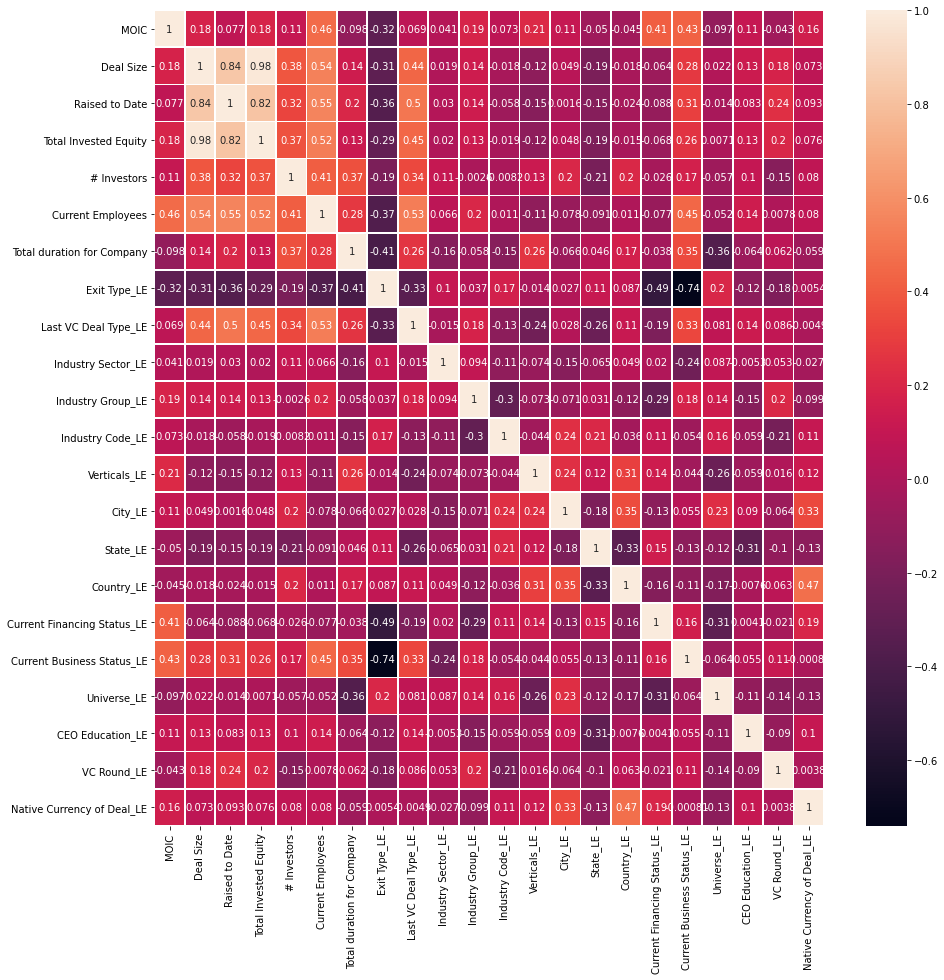

In [246]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

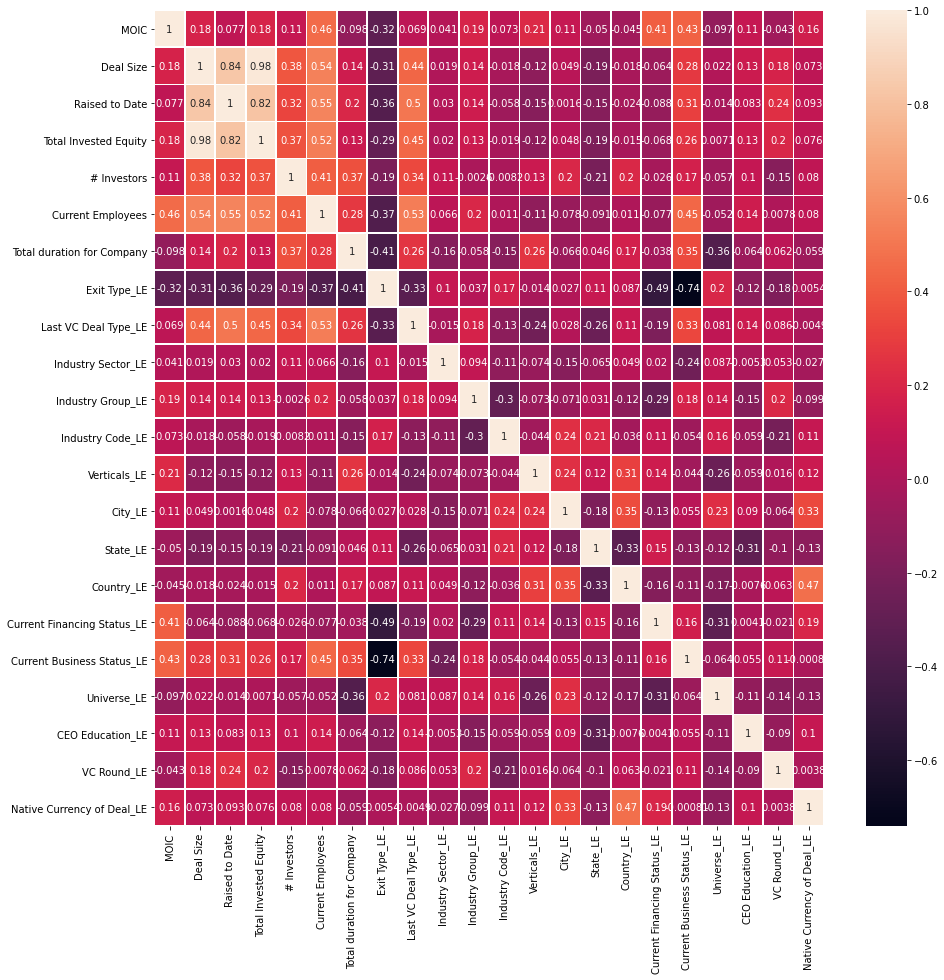

In [247]:
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [ ]:
dataset

,Exit Size (millions),Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,MOIC,Exit Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Last VC Deal Type_LE
3,166.00,10.10,0.00,16.44,2,2,6,2,16,16,14,11,2
8,106.10,1.94,0.00,54.69,2,2,6,10,33,11,9,4,7
9,22.67,0.64,0.00,35.26,2,2,5,13,31,47,3,10,4
12,126.30,7.00,7.00,18.04,2,2,3,17,26,37,1,11,5
15,407.53,182.15,115.59,2.24,1,2,6,15,31,35,1,11,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,152.53,9.90,0.00,15.41,1,2,6,0,32,40,9,3,3
331,111.91,7.71,0.00,14.51,2,2,6,2,1,12,9,3,3
336,800.00,36.00,35.00,22.22,0,2,6,2,16,35,1,11,8
346,8873.17,160.75,160.50,55.20,1,2,6,3,23,35,1,11,11


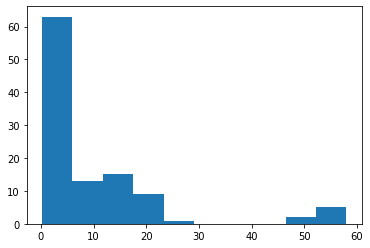

In [248]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['MOIC'])
pyplot.show()

In [ ]:
# boxplot of 
p = sn.boxplot(y='Total VC Capital', x='Last VC Deal Type', 
                 data=df_vc, 
                 palette="colorblind")
p.set_xticklabels(p.get_xticklabels(),rotation=90)

In [249]:
dataset

,MOIC,Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,16.44,10.10,10.10,10.10,2.000000,6.000000,8.0,2,1,1,3,2,13,9,10,7,1,0,7,5,1,3
17,3.81,3.30,3.30,3.30,6.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,1,3
18,3.81,14.50,17.80,14.50,3.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,2,3
19,3.81,20.00,37.80,20.00,8.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,25,3,3
21,8.94,158.00,335.00,158.00,20.000000,2062.000000,13.0,2,12,1,3,2,18,19,0,7,1,0,0,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.60,124.55,260.00,124.55,14.000000,200.000000,13.0,1,12,1,3,2,18,22,0,7,1,0,6,45,6,3
297,0.22,12.13,165.10,12.13,6.879121,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,10,9,3
298,0.22,51.35,139.00,51.35,18.000000,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,7,8,3
303,55.20,114.97,160.75,114.97,12.000000,3871.000000,10.0,1,9,1,3,3,16,20,0,7,1,2,6,25,5,3


In [250]:
#X1 = dataset.iloc[:, :4]
X = dataset.iloc[:, 1:-1]
#X = pd.concat([X1,X2], axis=1)
Y = dataset.iloc[:, 0:1]

In [ ]:
X

,Exit Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE
3,2,2,6,2,16,16,14,11
8,2,2,6,10,33,11,9,4
9,2,2,5,13,31,47,3,10
12,2,2,3,17,26,37,1,11
15,1,2,6,15,31,35,1,11
...,...,...,...,...,...,...,...,...
330,1,2,6,0,32,40,9,3
331,2,2,6,2,1,12,9,3
336,0,2,6,2,16,35,1,11
346,1,2,6,3,23,35,1,11


In [ ]:
Y

,MOIC
3,16.44
8,54.69
9,35.26
12,18.04
15,2.24
...,...
330,15.41
331,14.51
336,22.22
346,55.20


## Splitting the dataset into the Training set and Test set

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

     Exit Size (millions)  Total VC Capital Raised ($M)***  ...  City_LE  State_LE
124               7500.00                           350.50  ...       34         1
273              29843.40                          1401.76  ...       36         1
174                407.43                           121.03  ...       34         1
59                   5.00                             7.30  ...        0         4
324                 40.00                           183.19  ...       18        10
..                    ...                              ...  ...      ...       ...
292               1845.58                           345.22  ...       31         1
34                4100.00                           413.51  ...       34         1
278                 59.59                            37.66  ...       45         8
38                   0.15                             0.41  ...       32         9
126                163.80                            13.22  ...       13         2

[71

In [ ]:
print(X_test)

     Exit Size (millions)  Total VC Capital Raised ($M)***  ...  City_LE  State_LE
242                 40.00                             4.00  ...        2         7
274                199.28                            78.67  ...       23         1
203                 70.00                             5.72  ...       34         1
205                146.08                            37.50  ...       34         1
302                 17.20                             6.70  ...        6         9
283                450.00                            52.60  ...       34         1
234               6000.00                           105.11  ...       34         1
150                  6.00                             2.86  ...       25         8
167                559.00                           167.34  ...        1        14
127                 29.00                             0.50  ...       20         9
133                550.00                            33.50  ...       39        15
98  

In [ ]:
print(y_train)

      MOIC
124  21.40
273  21.29
174   3.37
59    0.68
324   0.22
..     ...
292   5.35
34    9.92
278   1.58
38    0.37
126  12.39

[71 rows x 1 columns]


In [ ]:
print(y_test)

      MOIC
242  10.00
274   2.53
203  12.25
205   3.90
302   2.57
283   8.56
234  57.08
150   2.10
167   3.34
127  58.00
133  16.42
98   48.52
271  11.03
87    5.81
347  12.56
187  12.00
35   65.34
9    35.26


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

TypeError: ignored

In [ ]:
print(X_train)

     Exit Size (millions)  Total VC Capital Raised ($M)***  ...  City_LE  State_LE
124               7500.00                           350.50  ...       34         1
273              29843.40                          1401.76  ...       36         1
174                407.43                           121.03  ...       34         1
59                   5.00                             7.30  ...        0         4
324                 40.00                           183.19  ...       18        10
..                    ...                              ...  ...      ...       ...
292               1845.58                           345.22  ...       31         1
34                4100.00                           413.51  ...       34         1
278                 59.59                            37.66  ...       45         8
38                   0.15                             0.41  ...       32         9
126                163.80                            13.22  ...       13         2

[71

In [ ]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


Linear Regression

In [252]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [253]:
y_predtest= multlin_model.predict(X_test)

y_predtrain = multlin_model.predict(X_train)


In [254]:
y_predtrain.mean(axis=0)

array([8.66790698])

In [255]:
from sklearn.metrics import mean_squared_error

rms1 = mean_squared_error(y_train, y_predtrain, squared=False)

In [256]:
rms1

6.219667552676288